Libro para empezar a hacer el análisis. Vamos a ir viendo las hipótesis y qué podemos sacar con el macrodataframe generado en merge_amazon copy.ipynb
Voy a copiar las hipótesis y ver qué puedo hacer directamente o qué tengo que seguir limpiando.

In [2]:
import pandas as pd
import numpy as np
import os
import shutil
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-pastel')
import seaborn as sns
sns.set_style("white")

##### Hipótesis principal
* El número de publicaciones anuales ha aumentado

In [3]:
# booksdataset vamos a ver si sacamos años de publicacion y categoría
df_h1 = pd.read_csv("../Data/a_booksdataset.csv")

In [4]:
df_h1.head(3)

,Unnamed: 0,title,authors,description,category,publisher,price_starting_with_($),publish_date_(month),publish_date_(year),category_1,category_2,category_resumen_1,category_top_10,year_range
0,45462,ferrets dr. wendy winsted (1992-10-02),"winsted, wendy",NaN,NaN,tfh publications,11.56,january,1755,NaN,NaN,NaN,NaN,Before 1950
1,100864,the rainy day book: pick-me-ups for when you'r...,mark gilroy communications,NaN,NaN,"j. countryman/thomas nelson, inc.",5.29,january,1787,NaN,NaN,NaN,NaN,Before 1950
2,65356,how to be the funniest kid in the whole wide w...,jay leno,NaN,NaN,simon & schuster,5.29,january,1793,NaN,NaN,NaN,NaN,Before 1950


In [5]:
df_h1.sort_values("publish_date_(year)", ascending= True, inplace=True)

In [6]:
df_h1.head(3)

,Unnamed: 0,title,authors,description,category,publisher,price_starting_with_($),publish_date_(month),publish_date_(year),category_1,category_2,category_resumen_1,category_top_10,year_range
0,45462,ferrets dr. wendy winsted (1992-10-02),"winsted, wendy",NaN,NaN,tfh publications,11.56,january,1755,NaN,NaN,NaN,NaN,Before 1950
1,100864,the rainy day book: pick-me-ups for when you'r...,mark gilroy communications,NaN,NaN,"j. countryman/thomas nelson, inc.",5.29,january,1787,NaN,NaN,NaN,NaN,Before 1950
2,65356,how to be the funniest kid in the whole wide w...,jay leno,NaN,NaN,simon & schuster,5.29,january,1793,NaN,NaN,NaN,NaN,Before 1950


In [18]:
# numero de títulos en el dataset
df_h1["title"].count()

np.int64(97109)

In [12]:
#df_h1.sort_values("year_range", ascending= True, inplace=True)

In [9]:
df_h1["category_top_10"].value_counts()

category_top_10
others                          32749
juvenile fiction                 6406
religion & spirituality          5512
mystery, thriller & suspense     4229
cooking                          3805
literary & fiction               3805
politics & social sciences       3551
romance                          3125
juvenile nonfiction              3025
history                          2959
business & economics             2878
Name: count, dtype: int64

In [ ]:
df_h1.pivot_table(index = "category_top_10", columns ="year_range", values= "title", aggfunc="count")
# hay demasiados años. Haré rangos:
# * 19

In [9]:
genre_decade = df_h1.pivot_table(index = "category_top_10", columns ="year_range", values= "title", aggfunc="count", margins=True, margins_name= "Total").sort_values(by="Total", axis=0, ascending= False)

In [ ]:
genre_decade.T

In [ ]:
plt.figure(figsize=(20,20))
genre_decade.T.iloc[:-1,2:].plot(kind='bar', stacked=False)
plt.title('Distribución de Categorías por Rango de Años')
plt.xlabel('Categorías')
plt.ylabel('Número de Títulos')
plt.legend(title='Rango de Años')
plt.xticks(rotation=45)
plt.show()

In [12]:
df_h1[df_h1["year_range"] == "After 2019"].shape

(55, 14)

Text(0, 0.5, 'Nº de libros')

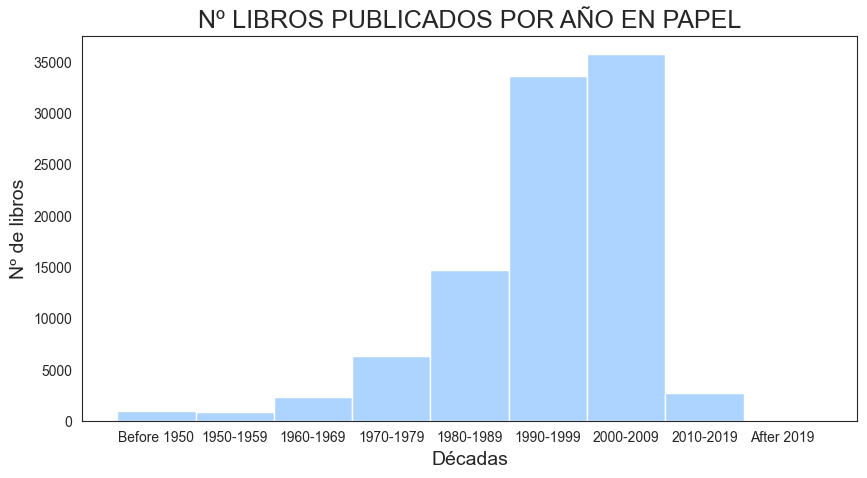

In [10]:
plt.figure(figsize= (10,5))
sns.histplot(df_h1, x= "year_range")
plt.grid(visible=False)
plt.title('Nº LIBROS PUBLICADOS POR AÑO EN PAPEL', fontsize=18)
plt.xlabel('Décadas', fontsize=14)
plt.ylabel('Nº de libros', fontsize=14)

In [ ]:
plt.figure(figsize=(20,20))
genre_decade.T.iloc[:-1,2:].plot(kind='bar', stacked=False)
plt.title('Distribución de Categorías por Rango de Años')
plt.xlabel('Categorías')
plt.ylabel('Número de Títulos')
plt.legend(title='Rango de Años')
plt.xticks(rotation=45)
plt.show()

In [24]:
df_h1["category_top_10"].value_counts()

category_top_10
others                          32749
juvenile fiction                 6406
religion & spirituality          5512
mystery, thriller & suspense     4229
cooking                          3805
literary & fiction               3805
politics & social sciences       3551
romance                          3125
juvenile nonfiction              3025
history                          2959
business & economics             2878
Name: count, dtype: int64

In [13]:
# vamos a intentar llegar al mismo punto con la bbdd de kindle
df_h1_kd = pd.read_csv("../Data/akindletotal.csv")

In [14]:
df_h1_kd.sort_values("published_year", ascending= True, inplace=True)

In [15]:
df_h1_kd.head(1)

,Unnamed: 0,asin,title,author,soldby,imgurl,producturl,stars,reviews,price,...,ranking_self-help,ranking_romance,ranking_humor & entertainment,ranking_reference,"ranking_health, fitness & dieting",ranking_sports & outdoors,ranking_medical,ranking_business & money,ranking_law,ranking_children's ebooks
130517,130517,b01k3lk4kg,percy jackson's greek gods by rick riordan (20...,NaN,NaN,https://m.media-amazon.com/images/i/51aril1bow...,https://www.amazon.com/dp/b01k3lk4kg,4.8,0,14.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3187.0


Text(0, 0.5, 'Nº de libros')

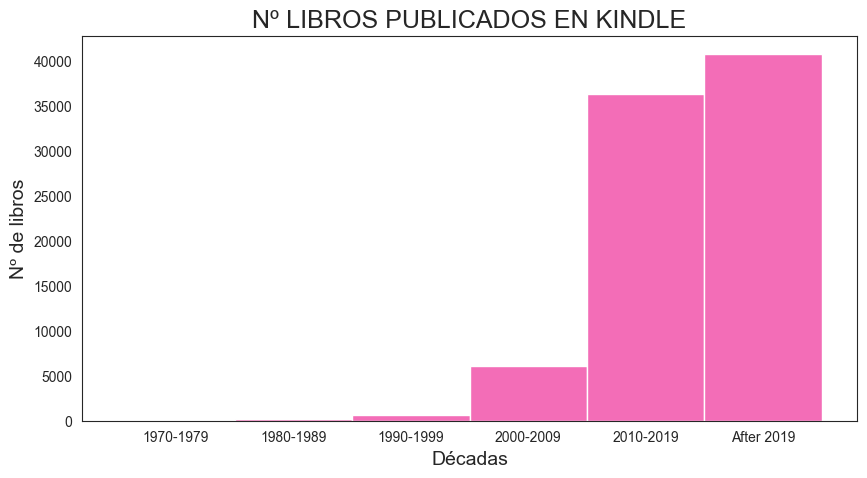

In [16]:
# se incluye filtro de que el año de publicación sea superior a 1971 porque fue en ese año cuando aparecieron
plt.figure(figsize= (10,5))
sns.histplot(df_h1_kd[df_h1_kd["published_year"]>1971], x= "year_range", color="#F03C9F")
plt.grid(visible=False)
plt.title('Nº LIBROS PUBLICADOS EN KINDLE', fontsize=18)
plt.xlabel('Décadas', fontsize=14)
plt.ylabel('Nº de libros', fontsize=14)

In [ ]:
category_top_10
others                          32749
juvenile fiction                 6406
religion & spirituality          5512
mystery, thriller & suspense     4229
cooking                          3805
literary & fiction               3805
politics & social sciences       3551
romance                          3125
juvenile nonfiction              3025
history                          2959
business & economics 

In [23]:
df_h1_kd["category_name"].value_counts()

category_name
mystery, thriller & suspense    6272
engineering & transportation    6162
science & math                  5955
parenting & relationships       5901
children's ebooks               5747
teen & young adult              5738
foreign language                5724
travel                          5526
lgbtq+ ebooks                   5517
computers & technology          5504
crafts, hobbies & home          5502
biographies & memoirs           5405
cookbooks, food & wine          5333
law                             5027
education & teaching            4986
religion & spirituality         4970
arts & photo graphy             4916
politics & social sciences      4207
literature & fiction            4152
humor & entertainment           4095
science fiction & fantasy       3995
self-help                       3493
reference                       3388
sports & outdoors               3206
medical                         2583
business & money                2577
romance                 

In [19]:
# numero de títulos en el dataset
df_h1_kd["title"].count()

np.int64(133102)

In [26]:
# booksdataset vamos a ver si sacamos años de publicacion y categoría
df_h2 = pd.read_csv("../Data/a_merge_amaukinbds.csv")

##### Otras hipótesis
* La autopublicación de libros ha aumentado

* Existe una relación entre el número de libros publicados por género y el número de libros leidos


* El formato de publicación del libro no afecta a su posición en el ranking de top leídos/escuchados


* No existe diferencia de géneros publicados por nacionalidad del autor


* Los libros más vendidos son los que más merchandising tienen.


* Existe una relación entre las ventas de libros y su publiación como series/películas

In [27]:
# publicados --suma libors,genero --- categoria,review --leidos 

"""
un data frame general, columna nombre y columna genero, unique 

de todos los dataframes, variable nombre, meterlo en una lista, compruebas los repetidos, cuentas cuantos libros

--> variable num_libros.

variable[ficion, terror,...]
variable =numero de libros vendidos agrupados por genero [300 mil, 400 mil,....]
variable = numero de reviews agrupado por generos[50 mil, 30 mil]

lista_1 todos generos
lista_2 todas las ventas por genero
lista_ todas las reviews por genero









 





"""
df_h2

,Unnamed: 0,price,ranks,title,no_of_reviews,ratings,author,cover_type,year,genre,...,category,publisher,price_starting_with_($),publish_date_(month),publish_date_(year),category_1,category_2,category_resumen_1,category_top_10,year_range_booksds
0,701,9.05,56.0,10-day green smoothie cleanse,32825.0,4.7,jj smith,paperback,2015,non fiction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,806,9.05,47.0,10-day green smoothie cleanse,32825.0,4.7,jj smith,paperback,2016,non fiction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,971,9.05,95.0,10-day green smoothie cleanse,32825.0,4.7,jj smith,paperback,2017,non fiction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,633,25.75,93.0,10-day green smoothie cleanse: lose up to 15 p...,32825.0,4.7,jj smith,paperback,2014,non fiction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,634,25.75,93.0,10-day green smoothie cleanse: lose up to 15 p...,32825.0,4.7,jj smith,paperback,2014,non fiction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1423,995,8.45,18.0,you are a badass: how to stop doubting your gr...,35414.0,4.7,jen sincero,paperback,2018,non fiction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1424,1132,8.45,42.0,you are a badass: how to stop doubting your gr...,35414.0,4.7,jen sincero,paperback,2019,non fiction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1425,480,16.50,58.0,zealot: the life and times of jesus of nazareth,7011.0,4.4,reza aslan,hardcover,2013,non fiction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1426,1141,13.49,51.0,zen as f*ck (zen as f*ck journals),23862.0,4.7,monica sweeney,paperback,2019,non fiction,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
